Imports & Loading Data

In [3]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
import nltk
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from wordcloud import WordCloud
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer
import string
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from nltk.stem import WordNetLemmatizer


In [4]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('amazon_top500.csv')

Saving amazon_top500.csv to amazon_top500 (1).csv


Validating Uploaded Data

In [ ]:
df.head()

,title,brand,description,price/currency,price/value,stars,reviewsCount
0,"65W Universal USB C Chromebook Charger,Replace...",NELEBUTO,NaN,$,13.69,4.2,55.0
1,"EMPSIGN Laptop Tote bag for women 16 Inch, Sty...",EMPSIGN,NaN,$,31.99,4.9,58.0
2,"100Pcs Mario Stickers, Cartoon Game Mario Stic...",MOQIAN,100Pcs Japanese Cartoon Game Mari Stickers for...,$,5.99,4.6,42.0
3,"USB Docking Station, JESWO USB 3.0 Laptop Dock...",JESWO,NaN,$,79.99,4.2,39.0
4,ANCBD C31N1824 Battery for Asus Chromebook Fli...,ANCBD,Specification: Battery Rating: 11.55V Battery ...,$,46.99,NaN,NaN


In [ ]:
df.tail()

,title,brand,description,price/currency,price/value,stars,reviewsCount
495,Cartoon Duck Stickers Duck Stickers Pack 50pcs...,AYODPE,About the product:Quantity: 50 pcs stickersMat...,$,5.99,NaN,NaN
496,GBOLE Replacement for HP Notebook 15-DY 15-DY0...,GBOLE,"Specification: Screen Size: 15.6"" Max. Resol...",$,69.00,NaN,NaN
497,DMKAOLLK USB-C Replacement for Lenovo Laptop C...,DMKAOLLK,NaN,$,16.99,NaN,NaN
498,Cloudstyle Laptop Backpack Slim Durable Colleg...,Cloudstyle,NaN,$,9.99,NaN,NaN
499,MULS L19M3PD9 57Wh Laptop Battery Replacement ...,MULS,NaN,$,75.99,NaN,NaN


Checking Null Values

In [ ]:
df.isnull().sum()

title               0
brand               0
description       245
price/currency     30
price/value        30
stars             241
reviewsCount      241
dtype: int64

In [ ]:
df['title'].nunique()

499

# Populating Missing Values and Data Transformations

Populating Currency Column with '$'

In [ ]:
df['price/currency'] = df['price/currency'].apply(lambda x: '$' if pd.isnull(x) else x)


In [ ]:
df_knn = df[['price/value','stars','reviewsCount']].copy()

In [ ]:
imputer = KNNImputer(n_neighbors=5)

df_knn_imputed = pd.DataFrame(imputer.fit_transform(df_knn), columns=df_knn.columns)

In [ ]:
display(df_knn_imputed)

,price/value,stars,reviewsCount
0,13.69,4.20,55.0
1,31.99,4.90,58.0
2,5.99,4.60,42.0
3,79.99,4.20,39.0
4,46.99,3.84,1145.8
...,...,...,...
495,5.99,4.80,176.6
496,69.00,4.54,105.4
497,16.99,4.68,268.8
498,9.99,3.68,7.0


Populating Missing 'Price/value' and 'stars' and 'reviewCount' using KNN

In [ ]:
df.update(df_knn_imputed[['price/value', 'stars', 'reviewsCount']])
df.head()

,title,brand,description,price/currency,price/value,stars,reviewsCount
0,"65W Universal USB C Chromebook Charger,Replace...",NELEBUTO,NaN,$,13.69,4.20,55.0
1,"EMPSIGN Laptop Tote bag for women 16 Inch, Sty...",EMPSIGN,NaN,$,31.99,4.90,58.0
2,"100Pcs Mario Stickers, Cartoon Game Mario Stic...",MOQIAN,100Pcs Japanese Cartoon Game Mari Stickers for...,$,5.99,4.60,42.0
3,"USB Docking Station, JESWO USB 3.0 Laptop Dock...",JESWO,NaN,$,79.99,4.20,39.0
4,ANCBD C31N1824 Battery for Asus Chromebook Fli...,ANCBD,Specification: Battery Rating: 11.55V Battery ...,$,46.99,3.84,1145.8


In [ ]:
df.tail()


,title,brand,description,price/currency,price/value,stars,reviewsCount
495,Cartoon Duck Stickers Duck Stickers Pack 50pcs...,AYODPE,About the product:Quantity: 50 pcs stickersMat...,$,5.99,4.80,176.6
496,GBOLE Replacement for HP Notebook 15-DY 15-DY0...,GBOLE,"Specification: Screen Size: 15.6"" Max. Resol...",$,69.00,4.54,105.4
497,DMKAOLLK USB-C Replacement for Lenovo Laptop C...,DMKAOLLK,NaN,$,16.99,4.68,268.8
498,Cloudstyle Laptop Backpack Slim Durable Colleg...,Cloudstyle,NaN,$,9.99,3.68,7.0
499,MULS L19M3PD9 57Wh Laptop Battery Replacement ...,MULS,NaN,$,75.99,4.24,117.6


Creating a 'text' column that concatenates 'title' and 'description'

In [ ]:
df['description'].fillna('', inplace=True)

df['text'] = df['title'] + ' ' + df['description']


print(df.head())

                                               title     brand  \
0  65W Universal USB C Chromebook Charger,Replace...  NELEBUTO   
1  EMPSIGN Laptop Tote bag for women 16 Inch, Sty...   EMPSIGN   
2  100Pcs Mario Stickers, Cartoon Game Mario Stic...    MOQIAN   
3  USB Docking Station, JESWO USB 3.0 Laptop Dock...     JESWO   
4  ANCBD C31N1824 Battery for Asus Chromebook Fli...     ANCBD   

                                         description price/currency  \
0                                                                 $   
1                                                                 $   
2  100Pcs Japanese Cartoon Game Mari Stickers for...              $   
3                                                                 $   
4  Specification: Battery Rating: 11.55V Battery ...              $   

   price/value  stars  reviewsCount  \
0        13.69   4.20          55.0   
1        31.99   4.90          58.0   
2         5.99   4.60          42.0   
3        79.99   4.2

In [ ]:
with pd.option_context('display.max_colwidth',None):
    display(df)

,title,brand,description,price/currency,price/value,stars,reviewsCount,text
0,"65W Universal USB C Chromebook Charger,Replacement Lenovo Yoga Google Asus Acer Dell Laptop Charger,AC Adapter Compatible with Lenovo X1 Thinkpad 45W Type C Charger",NELEBUTO,,$,13.69,4.20,55.0,"65W Universal USB C Chromebook Charger,Replacement Lenovo Yoga Google Asus Acer Dell Laptop Charger,AC Adapter Compatible with Lenovo X1 Thinkpad 45W Type C Charger"
1,"EMPSIGN Laptop Tote bag for women 16 Inch, Stylish Computer Shoulder Tote Bag for Work, Large Capacity Quilted Laptop Briefcase, Waterproof Women Business Office Bag, Quilted Black",EMPSIGN,,$,31.99,4.90,58.0,"EMPSIGN Laptop Tote bag for women 16 Inch, Stylish Computer Shoulder Tote Bag for Work, Large Capacity Quilted Laptop Briefcase, Waterproof Women Business Office Bag, Quilted Black"
2,"100Pcs Mario Stickers, Cartoon Game Mario Stickers for Kids, Mario Bros Decal Gifts, Waterproof Vinyl Stickers for Teen Adut Water Bottle, Laptop, Skateboard",MOQIAN,"100Pcs Japanese Cartoon Game Mari Stickers for Adult Girl Boy Notebook, Computer, Luggage, Phone, Scrapbook, Guitar, Bike, Car, Helmet, Snowboard, Bumper, Cup.",$,5.99,4.60,42.0,"100Pcs Mario Stickers, Cartoon Game Mario Stickers for Kids, Mario Bros Decal Gifts, Waterproof Vinyl Stickers for Teen Adut Water Bottle, Laptop, Skateboard 100Pcs Japanese Cartoon Game Mari Stickers for Adult Girl Boy Notebook, Computer, Luggage, Phone, Scrapbook, Guitar, Bike, Car, Helmet, Snowboard, Bumper, Cup."
3,"USB Docking Station, JESWO USB 3.0 Laptop Docking Station Dual Monitor (Dual Video HDMI & VGA, Gigabit Ethernet, Audio, and More USB Ports)-Grey",JESWO,,$,79.99,4.20,39.0,"USB Docking Station, JESWO USB 3.0 Laptop Docking Station Dual Monitor (Dual Video HDMI & VGA, Gigabit Ethernet, Audio, and More USB Ports)-Grey"
4,ANCBD C31N1824 Battery for Asus Chromebook Flip C434 C434TA Series C434TA-AI0029 C434TA-AI0045 C434TA-AI0081 C434TA-DH342T C434TA-E10001 0B200-03290000 3ICP3/91/91 C31PnC1 11.55V 48Wh/4160mAh,ANCBD,"Specification: Battery Rating: 11.55V Battery Capacity:48Wh/4160mAh Battery Type: Li-Polymer battery Condition: new battery Battery Color: Black Warranty: 12 Months Compatible Part Numbers: C31N1824 0B200-03290000 3ICP3/91/91 C31PnC1. Compatible Machine Models: For ASUS Chromebook Flip C434 Series: For ASUS Chromebook Flip C434TA Series: C434, C434TA, C434TA-1A C434TA-AI0029, C434TA-AI0030, C434TA-AI0033, C434TA-AI0040, C434TA-AI0041, C434TA-AI0043, C434TA-AI0043P C434TA-AI0045, C434TA-AI0051, C434TA-AI0060, C434TA-AI0062, C434TA-AI0063, C434TA-AI0064, C434TA-AI0080 C434TA-AI0081, C434TA-AI0084, C434TA-AI0089, C434TA-AI0094, C434TA-AI0095 C434TA-AI0107, C434TA-AI0108, C434TA-AI0109, C434TA-AI0110, C434TA-AI0115, C434TA-AI0121, C434TA-AI0122 C434TA-AI0207, C434TA-AI0225, C434TA-AI0234, C434TA-AI0259, C434TA-AI0264, C434TA-AI0276, C434TA-AI0278, C434TA-AI0296 C434TA-AI0303, C434TA-AI0304, C434TA-AI0362, C434TA-AI0364, C434TA-AI0390, C434TA-AI0394, C434TA-AI3860 C434TA-AI0403, C434TA-AI0476, C434TA-AI0477, C434TA-AI0485, C434TA-AI049, C434TA-AI0499 C434TA-AI0543, C434TA-AI0544,C434TA-AIZ030, C434TA-AIZ032 C434TA-DH342T, C434TA-DS384, C434TA-DS384T, C434TA-DS584, C434TA-DS588T, C434TA-DSM4T C434TA-E10001, C434TA-E10008, C434TA-E10011, C434TA-E10012, C434TA-E10013, C434TA-E10022 C434TA-GE384T, C434TA-GE588T, C434TA-I5-VEOUK, C434TA-M3-VEOUK, C434TA-YZ588T Compatible Part Numbers: BP3S1P2160, BP3S1P2160-S, BP3S1P2290, BP3S1P2290 A, GBM3X2 242857100001, 242888700087, 441857100001, 441888700086, 2ICP7/64/84, 3ICP6/51/61. Compatible Machine Models: Fit for Getac F110 Tablet PC Series: Getac F110 Getac F110 G2 Getac F110 G3 Getac F110 G4 F110, F110 G2 F110 GGA 734020 F110 G2-Core i5 5300U 2 3 GHZ",$,46.99,3.84,1145.8,"ANCBD C31N1824 Battery for Asus Chromebook Flip C434 C434TA Series C434TA-AI0029 C434TA-AI0045 C434TA-AI0081 C434TA-DH342T C434TA-E10001 0B200-03290000 3ICP3/91/91 C31PnC1 11.55V 48Wh/4160mAh Specification: Battery Rating: 11.55V Battery

Normalization and Tokenization of 'text' Column into a new 'Tokens' Column

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

In [ ]:
def tokenize_text(text):
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.lower() not in stop_words and word.lower() not in punctuation]
    tokens = list(set(tokens))
    return tokens

lemmatizer = WordNetLemmatizer()

In [ ]:
df['tokens'] = df['text'].apply(tokenize_text)

In [ ]:
with pd.option_context('display.max_colwidth',None):
    display(df)

,title,brand,description,price/currency,price/value,stars,reviewsCount,text,tokens
0,"65W Universal USB C Chromebook Charger,Replacement Lenovo Yoga Google Asus Acer Dell Laptop Charger,AC Adapter Compatible with Lenovo X1 Thinkpad 45W Type C Charger",NELEBUTO,,$,13.69,4.20,55.0,"65W Universal USB C Chromebook Charger,Replacement Lenovo Yoga Google Asus Acer Dell Laptop Charger,AC Adapter Compatible with Lenovo X1 Thinkpad 45W Type C Charger","[dell, chromebook, thinkpad, charger, 45w, universal, usb, x1, lenovo, c, compatible, laptop, type, adapter, replacement, asus, acer, ac, 65w, yoga, google]"
1,"EMPSIGN Laptop Tote bag for women 16 Inch, Stylish Computer Shoulder Tote Bag for Work, Large Capacity Quilted Laptop Briefcase, Waterproof Women Business Office Bag, Quilted Black",EMPSIGN,,$,31.99,4.90,58.0,"EMPSIGN Laptop Tote bag for women 16 Inch, Stylish Computer Shoulder Tote Bag for Work, Large Capacity Quilted Laptop Briefcase, Waterproof Women Business Office Bag, Quilted Black","[empsign, woman, work, 16, quilted, waterproof, stylish, bag, inch, briefcase, office, black, business, laptop, shoulder, capacity, tote, large, computer]"
2,"100Pcs Mario Stickers, Cartoon Game Mario Stickers for Kids, Mario Bros Decal Gifts, Waterproof Vinyl Stickers for Teen Adut Water Bottle, Laptop, Skateboard",MOQIAN,"100Pcs Japanese Cartoon Game Mari Stickers for Adult Girl Boy Notebook, Computer, Luggage, Phone, Scrapbook, Guitar, Bike, Car, Helmet, Snowboard, Bumper, Cup.",$,5.99,4.60,42.0,"100Pcs Mario Stickers, Cartoon Game Mario Stickers for Kids, Mario Bros Decal Gifts, Waterproof Vinyl Stickers for Teen Adut Water Bottle, Laptop, Skateboard 100Pcs Japanese Cartoon Game Mari Stickers for Adult Girl Boy Notebook, Computer, Luggage, Phone, Scrapbook, Guitar, Bike, Car, Helmet, Snowboard, Bumper, Cup.","[snowboard, water, cup, game, bike, mario, adut, decal, notebook, waterproof, kid, car, teen, 100pcs, helmet, bumper, japanese, gift, bottle, guitar, adult, boy, laptop, vinyl, luggage, bros, scrapbook, sticker, cartoon, skateboard, girl, mari, phone, computer]"
3,"USB Docking Station, JESWO USB 3.0 Laptop Docking Station Dual Monitor (Dual Video HDMI & VGA, Gigabit Ethernet, Audio, and More USB Ports)-Grey",JESWO,,$,79.99,4.20,39.0,"USB Docking Station, JESWO USB 3.0 Laptop Docking Station Dual Monitor (Dual Video HDMI & VGA, Gigabit Ethernet, Audio, and More USB Ports)-Grey","[dual, -grey, jeswo, vga, laptop, gigabit, audio, monitor, station, docking, usb, video, hdmi, port, ethernet, 3.0]"
4,ANCBD C31N1824 Battery for Asus Chromebook Flip C434 C434TA Series C434TA-AI0029 C434TA-AI0045 C434TA-AI0081 C434TA-DH342T C434TA-E10001 0B200-03290000 3ICP3/91/91 C31PnC1 11.55V 48Wh/4160mAh,ANCBD,"Specification: Battery Rating: 11.55V Battery Capacity:48Wh/4160mAh Battery Type: Li-Polymer battery Condition: new battery Battery Color: Black Warranty: 12 Months Compatible Part Numbers: C31N1824 0B200-03290000 3ICP3/91/91 C31PnC1. Compatible Machine Models: For ASUS Chromebook Flip C434 Series: For ASUS Chromebook Flip C434TA Series: C434, C434TA, C434TA-1A C434TA-AI0029, C434TA-AI0030, C434TA-AI0033, C434TA-AI0040, C434TA-AI0041, C434TA-AI0043, C434TA-AI0043P C434TA-AI0045, C434TA-AI0051, C434TA-AI0060, C434TA-AI0062, C434TA-AI0063, C434TA-AI0064, C434TA-AI0080 C434TA-AI0081, C434TA-AI0084, C434TA-AI0089, C434TA-AI0094, C434TA-AI0095 C434TA-AI0107, C434TA-AI0108, C434TA-AI0109, C434TA-AI0110, C434TA-AI0115, C434TA-AI0121, C434TA-AI0122 C434TA-AI0207, C434TA-AI0225, C434TA-AI0234, C434TA-AI0259, C434TA-AI0264, C434TA-AI0276, C434TA-AI0278, C434TA-AI0296 C434TA-AI0303, C434TA-AI0304, C434TA-AI0362, C434TA-AI0364, C434TA-AI0390, C434TA-AI0394, C434TA-AI3860 C434TA-AI0403, C434TA-AI0476, C434TA-AI0477, C434TA-AI0485, C434TA-AI049, C434TA-AI0499 C434TA-AI0543, C434TA-AI0544,C434TA-AIZ030, C434TA-AIZ032 C434TA-DH342T, C434TA-DS384, C434TA-DS384T, C434TA-DS584, C434TA-DS588T, C434TA-DSM4T C434TA-E10001, C434TA-E10008, C434TA-E10011, C434TA-E10012, C434

# Sentiment Analysis

Creating a String Column 'tokens_as_string' of the Words in 'tokens'

In [ ]:
df['tokens_as_string'] = df['tokens'].apply(lambda x: ' '.join(x))
print(df['tokens_as_string'])

0      dell chromebook thinkpad charger 45w universal...
1      empsign woman work 16 quilted waterproof styli...
2      snowboard water cup game bike mario adut decal...
3      dual -grey jeswo vga laptop gigabit audio moni...
4      rating c434ta-ai0043p c434ta-ai0051 g4 48wh/41...
                             ...                        
495    ’ non-smooth kids/teen/adults water 3inch surf...
496    pay x wrong size 1366 attention 15-dy0013dx pl...
497    usb-c 65w/45w lenovo replacement compatible c ...
498    slim durable business laptop backpack cloudsty...
499    imh 5b10z19319 21b1002gc 5b10z19320 sb10z19322...
Name: tokens_as_string, Length: 500, dtype: object


Creating 'sentiment_score' Column and 'Sentiment_Lables' Column based on the score

In [ ]:
df['sentiment_score'] = df['tokens_as_string'].map(lambda x: TextBlob(x).sentiment.polarity)
df['Sentiments_labels'] = df['sentiment_score'].apply(lambda x: 'Negative' if x < 0 else ('Positive' if x > 0 else 'Neutral'))
df.drop(columns=['tokens_as_string'], inplace=True)

In [ ]:
df

,title,brand,description,price/currency,price/value,stars,reviewsCount,text,tokens,sentiment_score,Sentiments_labels,stars_category
0,"65W Universal USB C Chromebook Charger,Replace...",NELEBUTO,,$,13.69,4.20,55.0,"65W Universal USB C Chromebook Charger,Replace...","[dell, chromebook, thinkpad, charger, 45w, uni...",0.000000,Neutral,High Review
1,"EMPSIGN Laptop Tote bag for women 16 Inch, Sty...",EMPSIGN,,$,31.99,4.90,58.0,"EMPSIGN Laptop Tote bag for women 16 Inch, Sty...","[empsign, woman, work, 16, quilted, waterproof...",0.182540,Positive,High Review
2,"100Pcs Mario Stickers, Cartoon Game Mario Stic...",MOQIAN,100Pcs Japanese Cartoon Game Mari Stickers for...,$,5.99,4.60,42.0,"100Pcs Mario Stickers, Cartoon Game Mario Stic...","[snowboard, water, cup, game, bike, mario, adu...",-0.075000,Negative,High Review
3,"USB Docking Station, JESWO USB 3.0 Laptop Dock...",JESWO,,$,79.99,4.20,39.0,"USB Docking Station, JESWO USB 3.0 Laptop Dock...","[dual, -grey, jeswo, vga, laptop, gigabit, aud...",-0.050000,Negative,High Review
4,ANCBD C31N1824 Battery for Asus Chromebook Fli...,ANCBD,Specification: Battery Rating: 11.55V Battery ...,$,46.99,3.84,1145.8,ANCBD C31N1824 Battery for Asus Chromebook Fli...,"[rating, c434ta-ai0043p, c434ta-ai0051, g4, 48...",0.123232,Positive,Average Review
...,...,...,...,...,...,...,...,...,...,...,...,...
495,Cartoon Duck Stickers Duck Stickers Pack 50pcs...,AYODPE,About the product:Quantity: 50 pcs stickersMat...,$,5.99,4.80,176.6,Cartoon Duck Stickers Duck Stickers Pack 50pcs...,"[’, non-smooth, kids/teen/adults, water, 3inch...",0.189123,Positive,High Review
496,GBOLE Replacement for HP Notebook 15-DY 15-DY0...,GBOLE,"Specification: Screen Size: 15.6"" Max. Resol...",$,69.00,4.54,105.4,GBOLE Replacement for HP Notebook 15-DY 15-DY0...,"[pay, x, wrong, size, 1366, attention, 15-dy00...",0.093750,Positive,High Review
497,DMKAOLLK USB-C Replacement for Lenovo Laptop C...,DMKAOLLK,,$,16.99,4.68,268.8,DMKAOLLK USB-C Replacement for Lenovo Laptop C...,"[usb-c, 65w/45w, lenovo, replacement, compatib...",0.400000,Positive,High Review
498,Cloudstyle Laptop Backpack Slim Durable Colleg...,Cloudstyle,,$,9.99,3.68,7.0,Cloudstyle Laptop Backpack Slim Durable Colleg...,"[slim, durable, business, laptop, backpack, cl...",0.000000,Neutral,Average Review


Categorizing the data based on the stars given into a new 'categorize_stars' column

In [ ]:
def categorize_stars(stars):
    if stars >= 0 and stars < 2:
        return 'Bad Review'
    elif stars >= 2 and stars < 4:
        return 'Average Review'
    elif stars >= 4 and stars <= 5:
        return 'High Review'
    else:
        return 'Unknown'

In [ ]:
df['stars_category'] = df['stars'].apply(categorize_stars)

# Data Visualization

Top 5 Brands with Positive 'Sentiment_Labels'





In [ ]:
df[df['Sentiments_labels']=='Positive'].groupby(['brand','Sentiments_labels']).agg({'text':'count'}).sort_values('text',ascending=False).head()

,,text
brand,Sentiments_labels,
Generic,Positive,10
LOVEVOOK,Positive,5
PEHDPVS,Positive,5
SlimQ,Positive,4
Twelve South,Positive,4


Top 5 Brands with Negative 'Sentiment_Labels'


In [ ]:
df[df['Sentiments_labels']=='Negative'].groupby(['brand','Sentiments_labels']).agg({'text':'count'}).sort_values('text',ascending=False).head()

,,text
brand,Sentiments_labels,
LOVEVOOK,Negative,7
MOSISO,Negative,6
Smatree,Negative,6
AMCJJ,Negative,3
VNINE,Negative,2


Top 5 Brands with Neutral 'Sentiment_Labels'


In [ ]:
df[df['Sentiments_labels']=='Neutral'].groupby(['brand','Sentiments_labels']).agg({'text':'count'}).sort_values('text',ascending=False).head()

,,text
brand,Sentiments_labels,
UGXKNAE,Neutral,5
DGFTB,Neutral,5
Espacio,Neutral,4
ANVMSRO,Neutral,3
dokikalos,Neutral,3


Pie Chart showing 'Sentiments_Labels' percentages of the data

<Axes: ylabel='Sentiments_labels'>

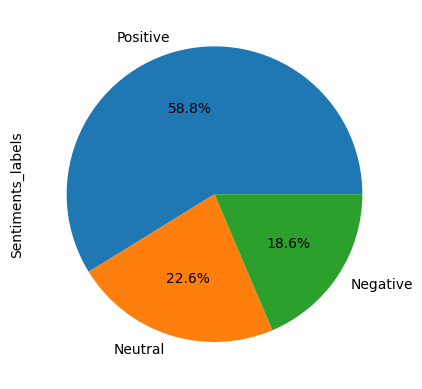

In [ ]:
df['Sentiments_labels'].value_counts().plot.pie(autopct='%1.1f%%')

Grouping the data based on 'Sentiment_Labels' and 'price/value'

In [ ]:
df.groupby(['Sentiments_labels','price/value']).agg({'text':'count'}).sort_values('text',ascending=False)

text
Sentiments_labels price/value      
Positive          5.990000       25
                  4.990000       12
                  19.990000      10
                  38.341702      10
                  6.990000       10
...                             ...
Neutral           59.990000       1
                  62.990000       1
                  63.990000       1
                  65.990000       1
Positive          575.000000      1

[255 rows x 1 columns]

Word cloud

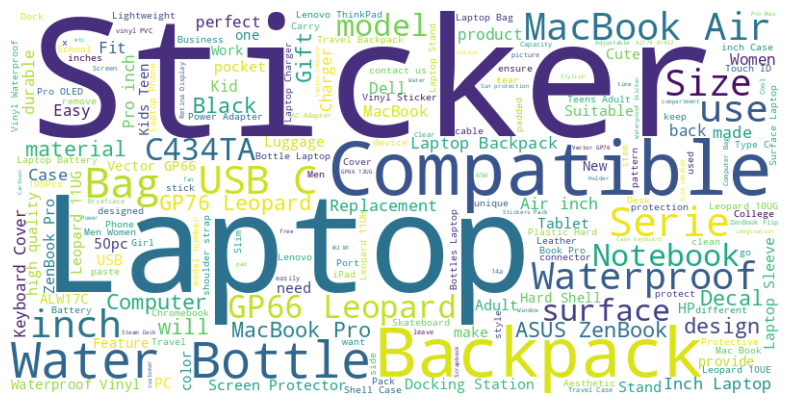

In [ ]:
text_combined = ' '.join(df['text'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Grouping the data based on 'Sentiments_labels' and 'stars_category'

In [ ]:
df.groupby(['Sentiments_labels','stars_category']).agg({'text':'count'}).sort_values('text',ascending=False)

,,text
Sentiments_labels,stars_category,
Positive,High Review,268
Neutral,High Review,106
Negative,High Review,84
Positive,Average Review,25
Negative,Average Review,8
Neutral,Average Review,7
Negative,Bad Review,1
Positive,Bad Review,1


In [6]:
df.to_csv('Cleaned_Amazon_Dataset.csv')